# CS229, Fall 2017
## Problem Set 1: Supervised Learning

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 1 is here: [ps1](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%201/ps1.pdf)

This notebook contains the solution for __Question 5: Quasar spectra Regression__

In [1]:
## import some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

### Question 5.a

#### i. Vectorize cost function

$$
\begin{align*}
J(\theta) &= \frac{1}{2} \sum_{i=1}^m w^i (\theta^Tx^i - y^i)^2 \\
&= \frac{1}{2} \sum_{i=1}^m (\theta^Tx^i - y^i) w^i (\theta^Tx^i - y^i) \\
&= \frac{1}{2} (X\theta - y)^TW(X\theta - y)
\end{align*}
$$

where $W = diag(w^i)$

#### ii. Normal equation for weighted regression

$$
\begin{align*}
\nabla_\theta J(\theta) &= \nabla_\theta \bigg[\frac{1}{2} (X\theta - y)^TW(X\theta - y)\bigg] \\ \\ 
    &= \nabla_\theta \bigg[\frac{1}{2} \big((X\theta)^TW(X\theta) - (X\theta)^TWy - y^TW(X\theta) + y^TWy\big)\bigg] \\ \\
    &= \nabla_\theta \bigg[\frac{1}{2} \big(\theta^T (X^TWX) \theta - (Wy)^TX\theta - y^TW(X\theta)\big)\bigg] \\ \\
    &= \nabla_\theta \bigg[\frac{1}{2} \big(\theta^T (X^TWX) \theta - 2[(WX)^Ty]^T \theta \big)  \bigg] \\ \\
    &= X^TWX \theta - X^TW^Ty \quad = 0 \\ \\
    &\implies \quad \theta = (X^TWX)^{-1}X^TWy
\end{align*}
$$

#### iii. Maximum likelihood function

The maximum likelihood function of model should be:

$$
\begin{align*}
& \max_{\theta}p(y| X; \theta) = \prod_{i=1}^m \frac{1}{\sqrt{2\pi} \sigma^i} exp \bigg(-\frac{(y^i - \theta^Tx^i)^2}{2(\sigma^i)^2} \bigg) \\ \\
\implies \quad & \max_{\theta} \log p(y| X; \theta) = \sum_{i=1}^m \log\bigg(\frac{1}{\sqrt{2\pi} \sigma^i} \bigg) - \frac{(y^i - \theta^Tx^i)^2}{2(\sigma^i)^2} \\ \\
\implies \quad & \min_{\theta} \frac{1}{2} \frac{(y^i - \theta^Tx^i)^2}{(\sigma^i)^2}
\end{align*}
$$

Pattern matching with $J(\theta)$ assumes $$w^i = \frac{1}{(\sigma^i)^2}$$

### Question 5.b)

#### i. First training example visulization

$$\theta = (X^TX)^{-1}X^Ty$$

In [2]:
train_data = pd.read_csv("data/quasar_train.csv")
train_data.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


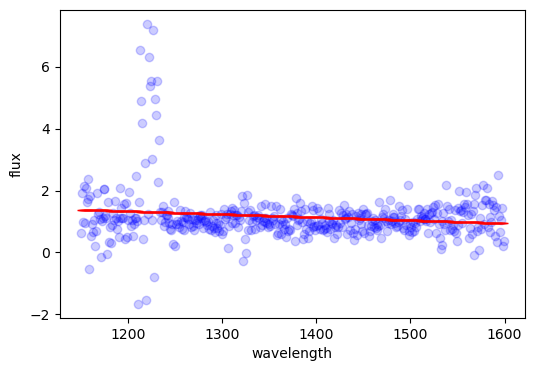

In [3]:
train_data = pd.read_csv("data/quasar_train.csv")
# add x0 = 1 for intercept term and form X

x0 = np.ones((train_data.shape[-1], 1))
X1 = np.array(train_data.columns).astype(float)
X = np.hstack((x0, X1.reshape(450, 1)))

Y1 = np.array(train_data.iloc[0]).reshape((450, 1))

theta = np.dot(np.linalg.inv(np.dot(X.T, X)),(X.T)).dot(Y1)
fig = plt.figure(figsize = (6, 4))
plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, X.dot(theta), "r_")
plt.xlabel("wavelength")
plt.ylabel("flux")
plt.show()

#### ii. Locally weighted regression visualization

$$\theta = (X^TWX)^{-1}X^TWy$$

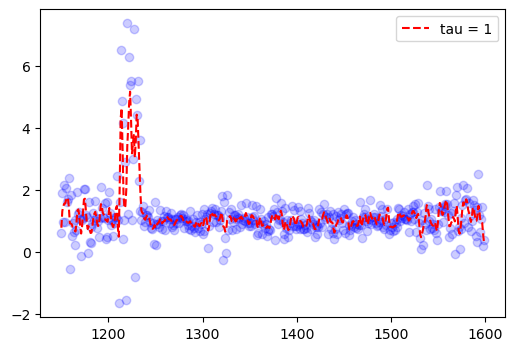

In [4]:
# In this regression, each training examples will have its own coefficients 
# which leads to multiple line

def weight(x, x_i, tau):
    w = np.exp(-(x-x_i)**2 / (2* tau**2))
    return np.diag(w)

def predict(Yi, tau):
    y_pred = np.zeros(Yi.shape[0])
    for k,x_i in enumerate(X):
        x0, x1 = x_i
        W = weight(X[:, 1], x1, tau)
        theta = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Yi)
        y = theta.T.dot(x_i)
        y_pred[k] = y
    return y_pred

fig = plt.figure(figsize = (6, 4))

plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, predict(Y1, 1),color = "red", linestyle = "dashed", label = "tau = 1")
plt.legend()
plt.show()


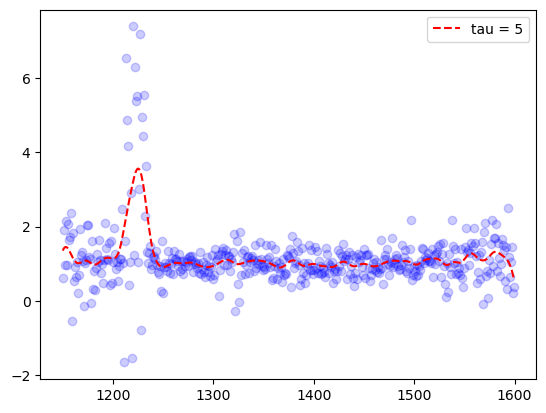

In [5]:
plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, predict(Y1, 5), color = "red", linestyle = "dashed", label = "tau = 5")
plt.legend()
plt.show()

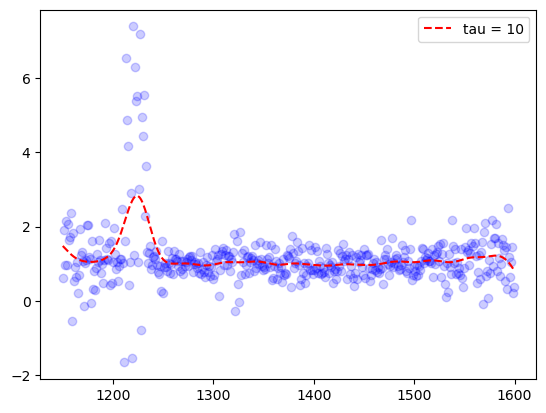

In [6]:
plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, predict(Y1, 10), color = "red", linestyle = "dashed", label = "tau = 10")
plt.legend()
plt.show()

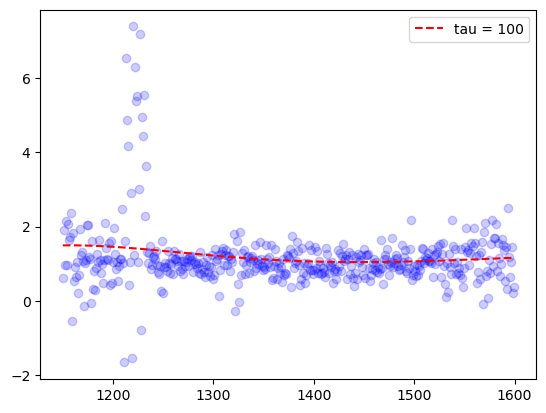

In [7]:
plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, predict(Y1, 100), color = "red", linestyle = "dashed", label = "tau = 100")
plt.legend()
plt.show()

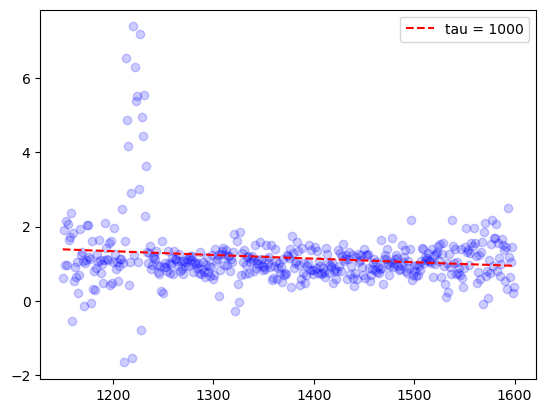

In [8]:
plt.scatter(X1, Y1, color = "blue", alpha = 0.2)
plt.plot(X1, predict(Y1, 1000), color = "red", linestyle = "dashed", label = "tau = 1000")
plt.legend()
plt.show()

__*Comments on tau:*__

As tau increases, the weights are closer to 0 rather than decreasing it. For this reason, our predictive line might end up being similar to original linear regression. With small tau, the line seems to fit with training examples, but if it is too small, some noise or overfitting might happen (see tau = 1 case).

### Question .5c)

#### i. Smooth the data

In [9]:
def smooth(data):
    tmp = data
    n, m = data.shape
    for i in range(n):
        old_Y = tmp.iloc[i]
        tmp.iloc[i] = predict(old_Y, 5)
    return tmp

smooth_train = smooth(train_data)
smooth_train.head()
    

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,-0.541991,-0.387919,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108119,1.147456,1.187883,1.226617
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [10]:
test_data = pd.read_csv("data/quasar_test.csv")
test_data.head()

,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00,1159.00,...,1590.00,1591.00,1592.00,1593.00,1594.00,1595.00,1596.00,1597.00,1598.00,1599.00
0,0.025,1.460,-0.057,1.37,2.090,1.150,-0.182,0.351,1.57,1.970,...,0.525,0.574,1.570,1.280,0.963,1.04,1.160,0.555,0.733,1.180
1,1.210,0.375,0.695,-0.09,0.275,-0.128,0.043,-0.054,1.40,1.950,...,0.658,0.579,1.670,1.230,1.230,1.19,1.220,0.932,1.280,0.338
2,1.380,-0.436,2.700,1.18,1.850,0.374,2.290,1.110,1.06,1.270,...,0.672,0.483,1.350,1.450,2.810,1.28,0.893,1.980,0.744,0.610
3,0.427,0.509,1.060,0.80,0.537,0.288,2.790,2.120,1.51,-0.937,...,0.928,1.020,0.462,1.040,1.070,1.64,1.250,0.706,0.673,1.480
4,-0.371,0.773,-0.621,1.84,0.284,-0.009,1.910,1.900,1.64,0.803,...,1.240,0.867,1.460,0.035,1.880,1.74,-0.225,0.711,-0.571,0.786


In [11]:
smooth_test = smooth(test_data)
smooth_test.head()

,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00,1159.00,...,1590.00,1591.00,1592.00,1593.00,1594.00,1595.00,1596.00,1597.00,1598.00,1599.00
0,0.726966,0.787762,0.829859,0.856746,0.872080,0.879516,0.882523,0.884200,0.887110,0.893152,...,1.003447,1.001629,0.998861,0.994578,0.988300,0.979687,0.968610,0.955232,0.940076,0.924079
1,0.525864,0.463779,0.431549,0.426621,0.445863,0.485711,0.542333,0.611780,0.690114,0.773510,...,1.098460,1.099193,1.097981,1.093323,1.083513,1.066662,1.040751,1.003702,0.953458,0.888063
2,1.181970,1.225149,1.251865,1.263700,1.262785,1.251650,1.233033,1.209672,1.184080,1.158358,...,1.127989,1.158025,1.190415,1.221852,1.248060,1.264099,1.264753,1.244963,1.200224,1.126909
3,0.582448,0.690672,0.784997,0.864325,0.928395,0.977867,1.014287,1.039927,1.057545,1.070075,...,1.140232,1.132643,1.123145,1.112413,1.101349,1.090951,1.082189,1.075935,1.072962,1.073997
4,0.054002,0.239424,0.409608,0.563863,0.701913,0.823983,0.930796,1.023487,1.103431,1.172032,...,0.998146,0.980781,0.948590,0.899980,0.834084,0.750847,0.651067,0.536380,0.409220,0.272759


In [12]:
smooth_train.columns = smooth_train.columns.astype(float)
smooth_test.columns = smooth_test.columns.astype(float)

#### ii. Estimate on training spectra

In [13]:
def ker(t):
    return np.maximum(1-t, 0)

def distance(f1, f2):
    # return array of distance for all wave lengths
    return np.sum((f1 - f2)**2, 1) 

def get_nearest_neighbors(distances, f: int):
    k = 3
    sorted_indices = np.argsort(distances)
    # return index in the dataset
    return sorted_indices[1: k+1]  # remove k = fi

In [14]:
def left_predict(training, testing, lyman):
    
    y_train_left = training[X1[X1 < lyman]].values
    y_train_right = training[X1[X1 >= lyman + 100]].values
    y_test_left = testing[X1[X1 < lyman]].values
    y_test_right = testing[X1[X1 >= lyman + 100]].values
    
    y_pred = np.zeros(y_test_left.shape)
    
    for j in range(y_test_right.shape[0]):
        distances = distance(y_train_right, y_test_right[j])
        nb_indices = get_nearest_neighbors(distances, j)
        weights = ker(distances / distances.max())[nb_indices]
        
        y_pred_ = np.sum(weights * y_train_left[nb_indices, :].T, 1) / np.sum(weights)
        y_pred[j, :] = y_pred_
    
    return y_pred, y_test_left

In [15]:
y_train_pred, y_train_left = left_predict(smooth_train, smooth_train, 1200)
y_train_pred

array([[0.58909804, 0.61234116, 0.64163271, ..., 0.96349755, 0.96946221,
        0.9818827 ],
       [1.48679101, 1.49562125, 1.4935283 , ..., 1.05181127, 1.06329001,
        1.07704178],
       [1.06868894, 1.12754969, 1.175245  , ..., 1.06010621, 1.07581829,
        1.09684444],
       ...,
       [0.58437261, 0.60783308, 0.62812038, ..., 1.06152475, 1.06749609,
        1.07797125],
       [0.44572812, 0.51419842, 0.58370127, ..., 1.09900363, 1.11170694,
        1.12937418],
       [1.20611107, 1.16695848, 1.12707317, ..., 1.07805301, 1.08889648,
        1.10260478]])

In [17]:
print(f"The average error in the training data is: {np.mean(distance(y_train_pred, y_train_left))}")

The average error in the training data is: 2.6219203753885263


#### iii. Estimate on test set

In [18]:
y_test_pred, y_test_left = left_predict(smooth_train, smooth_test, 1200)
y_test_pred, y_test_left

(array([[1.01510696, 0.98911695, 0.95464521, ..., 1.08141538, 1.08385888,
         1.09473901],
        [0.66921705, 0.76813117, 0.86194372, ..., 1.00274838, 1.01420435,
         1.02716623],
        [0.39529302, 0.50894705, 0.59880057, ..., 1.08780583, 1.0915175 ,
         1.09670343],
        ...,
        [0.92280614, 0.94729261, 0.97354884, ..., 1.10282538, 1.10208195,
         1.10548995],
        [0.37479838, 0.48250838, 0.58209012, ..., 1.09066761, 1.1090919 ,
         1.13342775],
        [1.42499882, 1.47192064, 1.49195855, ..., 0.98794698, 1.00360265,
         1.02263874]]),
 array([[ 0.72696634,  0.78776174,  0.82985936, ...,  1.02821913,
          1.04311384,  1.06767252],
        [ 0.52586387,  0.46377857,  0.43154926, ...,  1.14627437,
          1.1495135 ,  1.15381825],
        [ 1.18197001,  1.22514906,  1.25186514, ...,  1.06749181,
          1.09071239,  1.11637015],
        ...,
        [ 1.06527855,  1.1115778 ,  1.15129278, ...,  0.89444649,
          0.89848669,  0

In [19]:
print(f"The average error in the testing data is: {np.mean(distance(y_test_pred, y_test_left))}")

The average error in the testing data is: 3.170286918574261


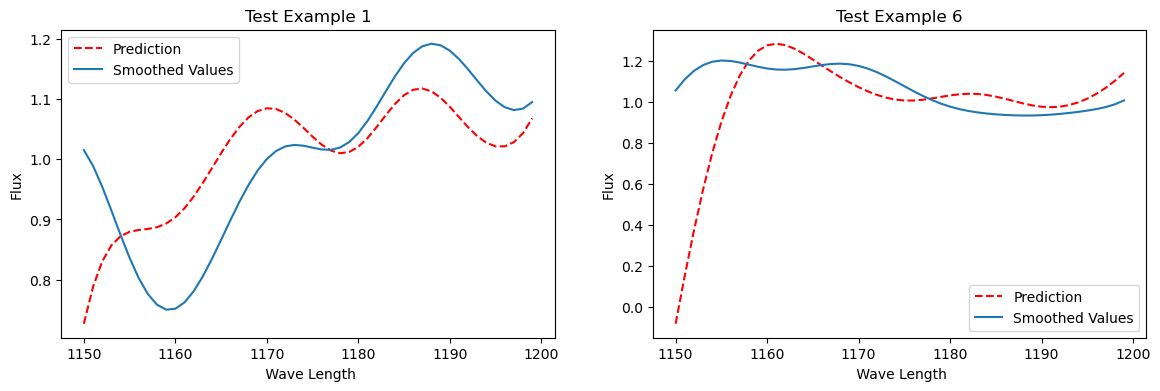

In [21]:
# Visualization

figure, axis = plt.subplots(1, 2, figsize = (14, 4))
axis[0].plot(X1[X1 < 1200], y_test_left[0, :], "r--")
axis[0].plot(X1[X1 < 1200], y_test_pred[0, :])
axis[0].set(xlabel = " Wave Length", ylabel = "Flux", title = "Test Example 1")
axis[0].legend(["Prediction", "Smoothed Values"])

axis[1].plot(X1[X1 < 1200], y_test_left[5, :], "r--")
axis[1].plot(X1[X1 < 1200], y_test_pred[5, :])
axis[1].set(xlabel = " Wave Length", ylabel = "Flux", title = "Test Example 6")
axis[1].legend(["Prediction", "Smoothed Values"])

plt.show()